In [1]:
from ipynb.fs.full.Models import *

# 0. Tables

In [2]:
fname = 'init_params.csv'
df = pd.read_csv(fname, sep=';')
df.index = df.Model
a_ws = np.array(df.loc[times[0]].a)
r_ws = np.array(df.loc[times[0]].r)
weights = [(float(a_ws[i]),float(r_ws[i])) for i in range(len(a_ws))]

In [3]:
fname='params/SIAR_models.csv'
df = pd.read_csv(fname, index_col=0)
df = df[df.country=='Italy']
df=df.drop(columns='country')
df

,AIC,cost,time,a,r,beta_I,beta_A,mu_I,mu_A,nu,I0,alpha,t_lock,beta_lock
0,-2507.599112,0.000351,fermi,1.0,1.0,0.000255,1.348909,4.083750e-04,2.216938,1.895153e-02,9.544178e-11,0.048691,62.420735,NaN
3,-2477.741865,0.000914,rational,0.0,1.0,0.008427,1.787311,4.597834e-02,0.161327,7.110934e-02,1.578736e-15,0.065336,NaN,NaN
5,-2464.610654,0.000627,rational,1.0,1.0,0.016945,2.927275,4.142765e-02,0.100299,3.463539e-02,3.501001e-19,0.094271,NaN,NaN
6,-2456.383037,0.000582,fermi,0.0,0.0,0.009314,1.114747,1.922163e-02,1.558120,1.213921e-02,1.550618e-10,0.035802,54.340411,NaN
7,-2453.632507,0.000603,rational,0.0,0.0,0.001848,2.237701,4.735511e-02,1.919470,2.320079e-02,1.749198e-10,0.013105,NaN,NaN
8,-2384.983120,0.001148,exp,0.0,1.0,1.311133,0.013943,1.110184e-07,0.695150,6.744477e-01,2.593845e-12,0.059801,NaN,NaN
9,-2384.535893,0.000687,exp,1.0,1.0,1.284332,0.088982,5.026800e-07,1.274351,8.122064e-01,2.126697e-12,0.059817,NaN,NaN
12,-2274.488192,0.001264,fermi,1.0,0.0,0.532479,15.926310,3.160817e-06,36.077005,6.120885e-02,5.593135e-13,0.058706,2.118160,NaN
15,-2256.767462,0.001270,exp,1.0,0.0,1.182409,0.034267,8.782607e-04,0.310080,3.486273e-01,7.840350e-12,0.057736,NaN,NaN
21,-2237.852904,0.001218,exp,0.0,0.0,1.152114,0.004587,3.780595e-03,0.289406,2.906432e-01,1.306231e-11,0.056226,NaN,NaN


In [4]:
fname='original_params/SIAR_models.csv'
df = pd.read_csv(fname, index_col=0)
df = df[df.country=='Italy']
df = df.drop(columns='country')
df = df.drop(columns='a')
df = df.drop(columns='r')
df

,AIC,cost,time,beta_I,beta_A,mu_I,mu_A,nu,I0,alpha,t_lock,beta_lock
0,-2486.657906,4.342522e-10,rational,0.409722,1.130532,0.048764,0.278938,0.037026,2.438331e-14,0.055963,NaN,NaN
2,-2292.542743,2.314692e-09,exp,0.208469,0.431053,0.058510,0.248954,0.391199,1.965277e-08,0.032194,NaN,NaN
7,-2164.565117,6.857142e-09,fermi,0.000115,1.817319,0.734012,2.616200,0.847144,1.692121e-07,0.005630,17.950190,NaN
18,-1906.588673,6.338489e-08,lock,2.891485,0.930040,2.419083,21.597413,0.459883,1.831151e-11,NaN,23.000016,2.139495


plot requires loaded models. Model(country, time)

In [5]:
# Load Models

models = []
for i,country in enumerate(countries):
    mods=[]
    for time in times:
        mod=Model(country, SIAR, time=time, start=starts[i])
        #mod=country+' '+time #just test line
        mods.append(mod)
    mods=dict(zip(times,mods))
    models.append(mods)
models=dict(zip(countries,models))

Creating SIAR for Italy
Loaded country's population
Loaded time series of 116 days
Lockdown at 2020-03-11 -> at day 49
VA-lockdown index: 32
Creating SIAR for Italy
Loaded country's population
Loaded time series of 116 days
Lockdown at 2020-03-11 -> at day 49
VA-lockdown index: 32
Creating SIAR for Italy
Loaded country's population
Loaded time series of 116 days
Lockdown at 2020-03-11 -> at day 49
VA-lockdown index: 32
Creating SIAR for Italy
Loaded country's population
Loaded time series of 116 days
Lockdown at 2020-03-11 -> at day 49
VA-lockdown index: 32
Creating SIAR for Germany
Loaded country's population
Loaded time series of 111 days
Lockdown at 2020-03-20 -> at day 58
VA-lockdown index: 41
Creating SIAR for Germany
Loaded country's population
Loaded time series of 111 days
Lockdown at 2020-03-20 -> at day 58
VA-lockdown index: 41
Creating SIAR for Germany
Loaded country's population
Loaded time series of 111 days
Lockdown at 2020-03-20 -> at day 58
VA-lockdown index: 41
Creatin

In [6]:
country = 'Italy'
i=c_index[country]

# 1. Fixed weights
Plot: v_a + beta + original data<br>
number of plots: times = 4

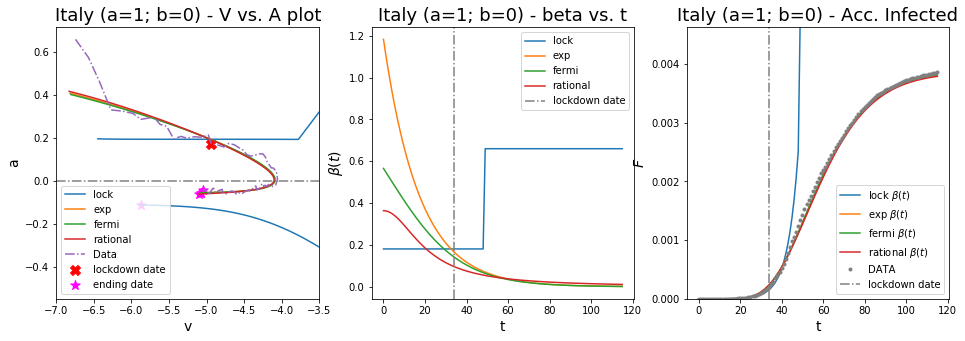

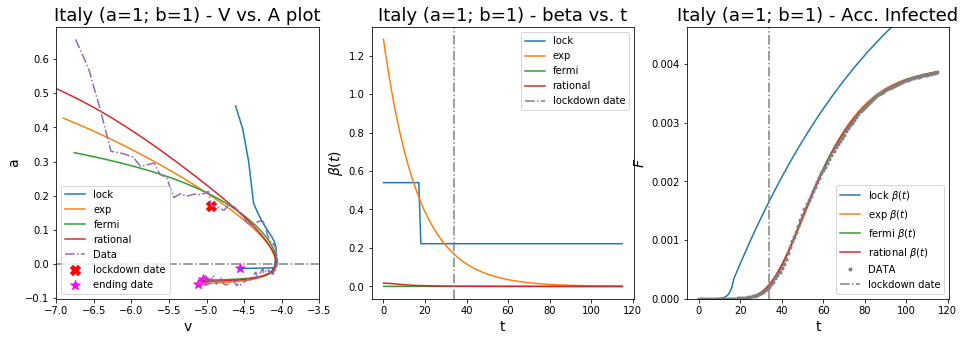

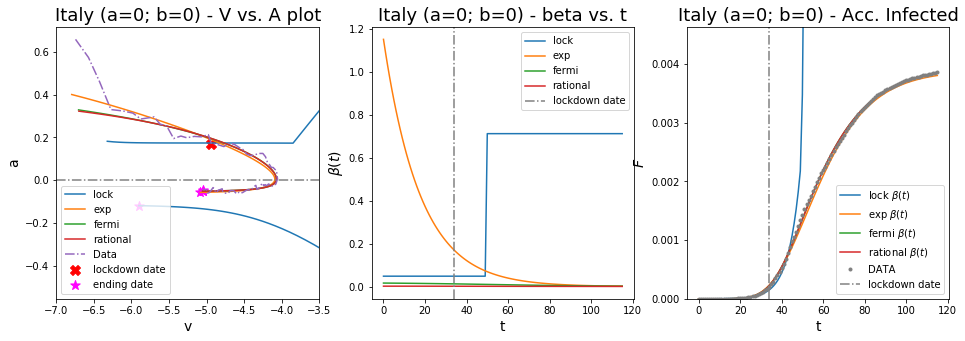

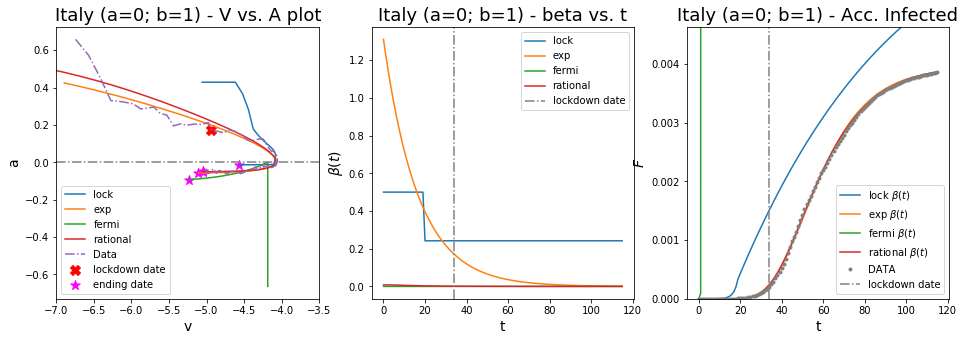

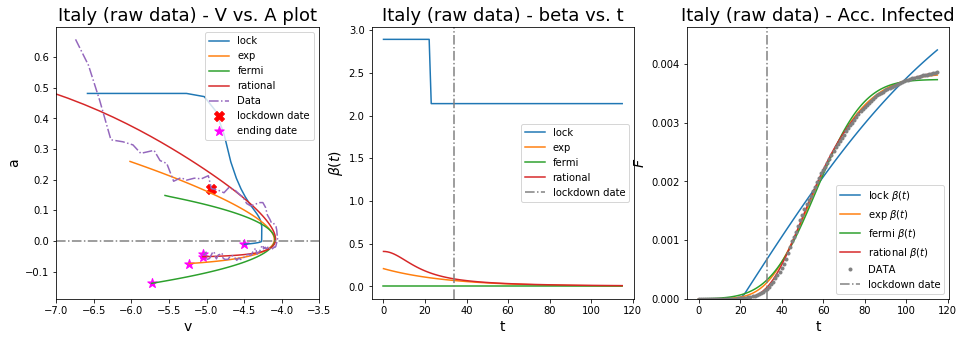

In [7]:
# DIFFERENT WEIGHTS
for a_w, r_w in weights:

    fig, (ax, ax2, ax3) = plt.subplots(1,3,figsize=(16,5))

    for time in times:
        #load models and params
        mod=models[country][time]
        fname=time+'_'+str(a_w)+'_'+str(r_w)+'.csv'
        df = pd.read_csv('params/'+fname, index_col=0)
        opt_params=list(df.loc[country][:-2])

        ##in-loop plots
        #va
        v, a = mod.predict(opt_params)
        ax.plot(v, a, label=time)
        ax.scatter(v[-1], a[-1], c='magenta',marker='*',s=100,zorder=2)

        #beta
        t = np.arange(0, mod.T)
        beta = mod.predict(opt_params, out='Beta')
        ax2.plot(t, beta, label=time)

        #time series
        F = mod.predict(opt_params,out='F')
        plt.plot(t, F, label = time + r' $\beta(t)$')

    ##after loop plots
    intitle = ' (a='+str(int(a_w))+'; b='+str(int(r_w))+')'
    #va
    ax.plot(mod.v_data, mod.a_data, '-.', label='Data')
    ax.scatter(mod.v_data[mod.lock_index-L-z-1], mod.a_data[mod.lock_index-L-z-1], 
                    c='red',marker='X',s=100, label='lockdown date')
    ax.scatter(mod.v_data[-1], mod.a_data[-1], 
                    c='magenta',marker='*',s=100,zorder=2, label='ending date')

    ax.set_xlim([-7., -3.5]) #not useful for fixed country
    ax.axhline(y=0, color='gray', linestyle='-.')
    ax.legend()
    ax.set_xlabel('v', size=14)
    ax.set_ylabel('a', size=14)
    ax.set_title(countries[i]+intitle+' - V vs. A plot', size=18)

    #beta
    ax2.axvline(x=mod.lock_index, color='grey', linestyle='-.', label='lockdown date')
    ax2.legend()
    ax2.set_xlabel('t', size=14)
    ax2.set_ylabel(r'$\beta(t)$', size=14)
    ax2.set_title(countries[i]+intitle+' - beta vs. t', size=18)

    #time series
    ax3.set_ylim([0,mod.data[-1]/mod.N*1.2])
    ax3.plot(t, mod.data/mod.N, '.', color='gray',label='DATA')
    ax3.axvline(x=mod.lock_index, color='grey', linestyle='-.', label='lockdown date')
    ax3.legend()
    ax3.set_xlabel('t', size=14)
    ax3.set_ylabel(r'$F$', size=14)
    ax3.set_title(countries[i]+intitle+' - Acc. Infected', size=18)
    plt.show()
    
    
# RAW DATA
fig, (ax, ax2, ax3) = plt.subplots(1,3,figsize=(16,5))

for time in times:
    #load models and params
    mod=models[country][time]
    fname=time+'.csv'
    df = pd.read_csv('original_params/'+fname, index_col=0)
    opt_params=list(df.loc[country][:-2])

    ##in-loop plots
    #va
    v, a = mod.predict(opt_params)
    ax.plot(v, a, label=time)
    ax.scatter(v[-1], a[-1], c='magenta',marker='*',s=100,zorder=2)

    #beta
    t = np.arange(0, mod.T)
    beta = mod.predict(opt_params, out='Beta')
    ax2.plot(t, beta, label=time)

    #time series
    F = mod.predict(opt_params,out='F')
    plt.plot(t, F, label = time + r' $\beta(t)$')

##after loop plots
intitle = ' (raw data)'
#va
ax.plot(mod.v_data, mod.a_data, '-.', label='Data')
ax.scatter(mod.v_data[mod.lock_index-L-z-1], mod.a_data[mod.lock_index-L-z-1], 
                c='red',marker='X',s=100, label='lockdown date')
ax.scatter(mod.v_data[-1], mod.a_data[-1], 
                c='magenta',marker='*',s=100,zorder=2, label='ending date')

ax.set_xlim([-7., -3.5]) #not useful for fixed country
ax.axhline(y=0, color='gray', linestyle='-.')
ax.legend()
ax.set_xlabel('v', size=14)
ax.set_ylabel('a', size=14)
ax.set_title(countries[i]+intitle+' - V vs. A plot', size=18)

#beta
ax2.axvline(x=mod.lock_index, color='grey', linestyle='-.', label='lockdown date')
ax2.legend()
ax2.set_xlabel('t', size=14)
ax2.set_ylabel(r'$\beta(t)$', size=14)
ax2.set_title(countries[i]+intitle+' - beta vs. t', size=18)

#time series
ax3.set_ylim([0,mod.data[-1]/mod.N*1.2])
ax3.plot(t, mod.data/mod.N, '.', color='gray',label='DATA')
ax3.axvline(x=mod.lock_index-1, color='grey', linestyle='-.', label='lockdown date')
ax3.legend()
ax3.set_xlabel('t', size=14)
ax3.set_ylabel(r'$F$', size=14)
ax3.set_title(countries[i]+intitle+' - Acc. Infected', size=18)
plt.show()

# 2. different weights, fixed time

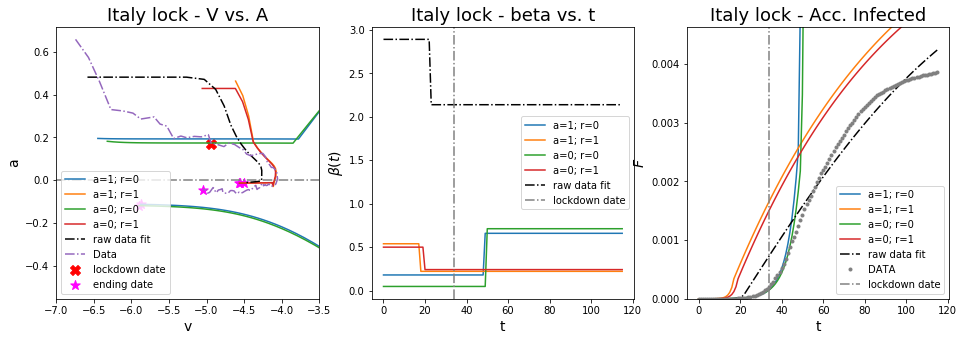

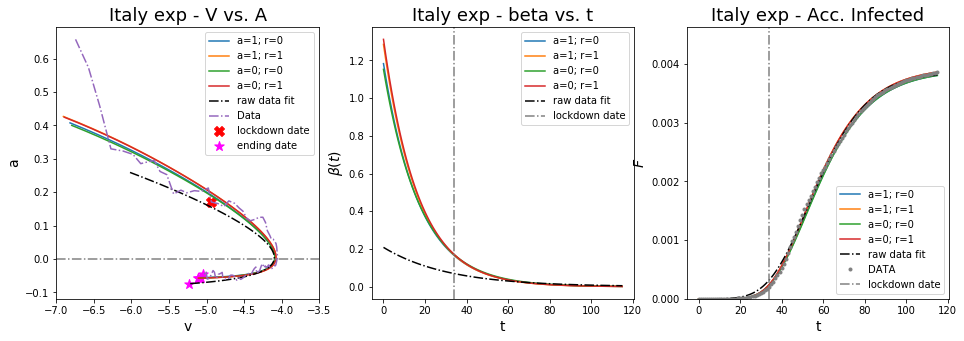

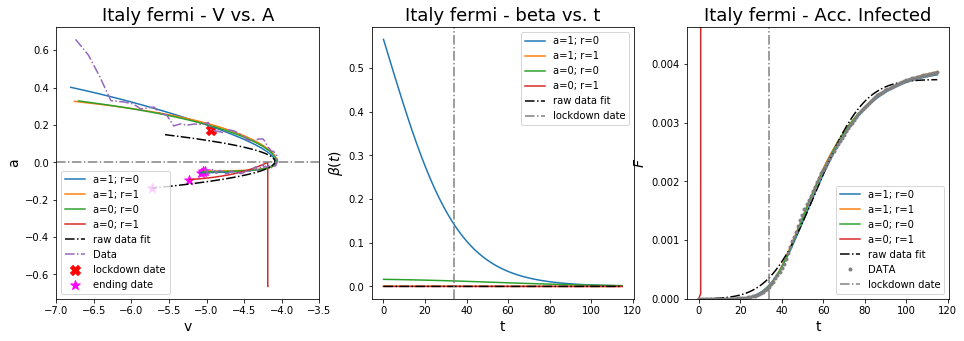

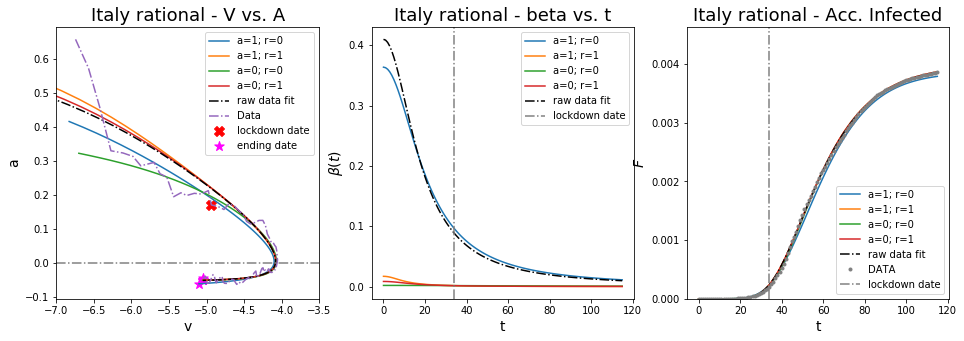

In [8]:
for time in times:
    fig, (ax, ax2, ax3) = plt.subplots(1,3,figsize=(16,5))

    # WEIGHTS FIT
    for a_w,r_w in weights:
        label='a=' +str(int(a_w))+'; r='+str(int(r_w))
        #load models and params
        mod=models[country][time]
        fname=time+'_'+str(a_w)+'_'+str(r_w)+'.csv'
        df = pd.read_csv('params/'+fname, index_col=0)
        opt_params=list(df.loc[country][:-2])

        ##in-loop plots
        #va
        v, a = mod.predict(opt_params)
        ax.plot(v, a, label=label)
        ax.scatter(v[-1], a[-1], c='magenta',marker='*',s=100,zorder=2)

        #beta
        t = np.arange(0, mod.T)
        beta = mod.predict(opt_params, out='Beta')
        ax2.plot(t, beta, label=label)

        #time series
        F = mod.predict(opt_params,out='F')
        plt.plot(t, F, label = label)
    
    # RAW DATA FIT
    mod=models[country][time]
    fname=time+'.csv'
    df = pd.read_csv('original_params/'+fname, index_col=0)
    opt_params=list(df.loc[country][:-2])

    ##in-loop plots
    label='raw data fit'
    #va
    v, a = mod.predict(opt_params)
    ax.plot(v, a, '-.', label=label, color='black')
    ax.scatter(v[-1], a[-1], c='magenta',marker='*',s=100,zorder=2)

    #beta
    t = np.arange(0, mod.T)
    beta = mod.predict(opt_params, out='Beta')
    ax2.plot(t, beta, '-.', label=label, color='black')

    #time series
    F = mod.predict(opt_params,out='F')
    plt.plot(t, F, '-.', label = label, color='black')

    ##after loop plots
    intitle=' '+time
    #va
    ax.plot(mod.v_data, mod.a_data, '-.', label='Data')
    ax.scatter(mod.v_data[mod.lock_index-L-z-1], mod.a_data[mod.lock_index-L-z-1], 
                    c='red',marker='X',s=100, label='lockdown date')
    ax.scatter(mod.v_data[-1], mod.a_data[-1], 
                    c='magenta',marker='*',s=100,zorder=2, label='ending date')

    ax.set_xlim([-7., -3.5]) #not useful for fixed country
    ax.axhline(y=0, color='gray', linestyle='-.')
    ax.legend()
    ax.set_xlabel('v', size=14)
    ax.set_ylabel('a', size=14)
    ax.set_title(countries[i]+intitle+' - V vs. A', size=18)

    #beta
    ax2.axvline(x=mod.lock_index, color='grey', linestyle='-.', label='lockdown date')
    ax2.legend()
    ax2.set_xlabel('t', size=14)
    ax2.set_ylabel(r'$\beta(t)$', size=14)
    ax2.set_title(countries[i]+intitle+' - beta vs. t', size=18)

    #time series
    ax3.set_ylim([0,mod.data[-1]/mod.N*1.2])
    ax3.plot(t, mod.data/mod.N, '.', color='gray',label='DATA')
    ax3.axvline(x=mod.lock_index, color='grey', linestyle='-.', label='lockdown date')
    ax3.legend()
    ax3.set_xlabel('t', size=14)
    ax3.set_ylabel(r'$F$', size=14)
    ax3.set_title(countries[i]+intitle+' - Acc. Infected', size=18)
    plt.show()

# 3. AIC comparison

In [10]:
fname='params/SIAR_models.csv'
df = pd.read_csv(fname, index_col=0)
df = df[df.country=='Italy']
df=df.drop(columns='country')

In [11]:
fname='original_params/SIAR_models.csv'
df_raw = pd.read_csv(fname, index_col=0)
df_raw = df_raw[df_raw.country=='Italy']
df_raw = df_raw.drop(columns='country')

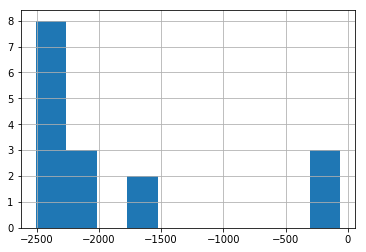

In [12]:
df.AIC.hist()
plt.show()

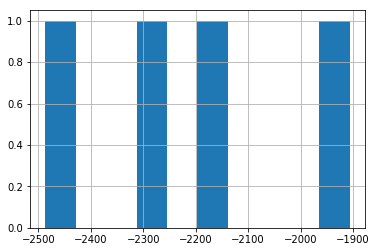

In [13]:
df_raw.AIC.hist()
plt.show()

In [14]:
#rearange df in weights order:
df = df.sort_values('a',axis=0, ascending=False)
df1 = df[df.a==1.].sort_values('r')
df1.index = range(len(df1))
df2 = df[df.a==0.].sort_values('r')
df2.index = range(len(df1),2*len(df1))
df = pd.concat([df1,df2])
df = pd.concat([df, df_raw])

df = df.drop(columns='a')
df = df.drop(columns='r')

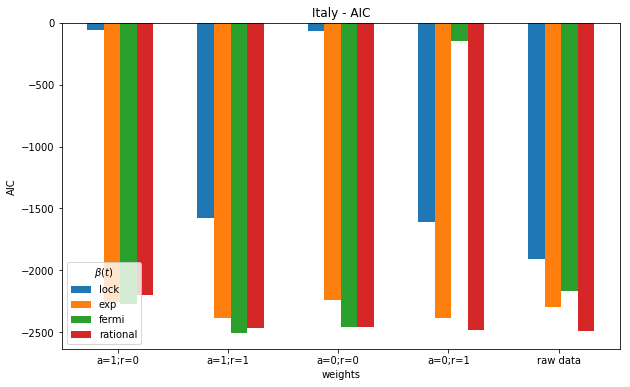

In [15]:
#barplot
plt.figure(figsize=(10,6))

width=0.15
x=np.array(np.arange(5)-3*width)

data=[]
for i,time in enumerate(times):
    data=df[df.time==time]
    plt.bar(x + i*width,list(data.AIC), width = width)

plt.legend(title=r'$\beta(t)$', labels=times)
x_lab = ['a='+str(int(weights[i][0]))+';r='+ str(int(weights[i][1])) for i in range(4)]
x_lab.append('raw data')
plt.xticks(x+0.2, labels=x_lab)
plt.title(country + ' - AIC')
plt.xlabel('weights')
plt.ylabel('AIC')
plt.show()

# 4.Parameters

In [16]:
df=df[list(df.columns)[2:]]

In [17]:
params=np.array(df.columns[1:])
params

array(['beta_I', 'beta_A', 'mu_I', 'mu_A', 'nu', 'I0', 'alpha', 't_lock',
       'beta_lock'], dtype=object)

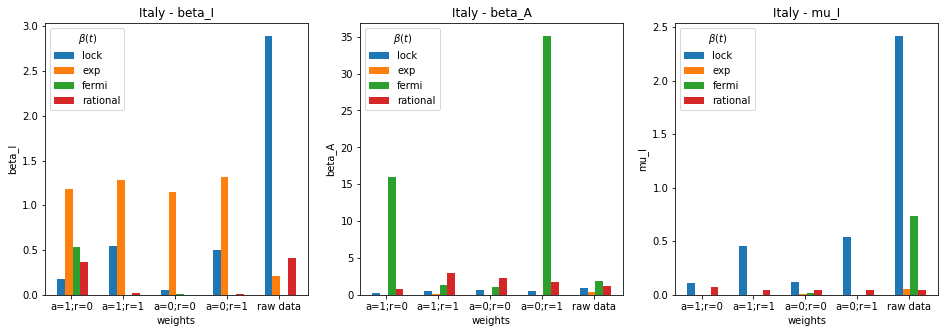

In [18]:
#SIR params

#barplot
width=0.15
x=np.array(np.arange(5)-3*width)
fig = plt.figure(figsize=(16,5))
for j,p in enumerate(params[:3]):
    data=[]
    plt.subplot(1,3,j+1)
    for i,time in enumerate(times):
        data=df[df.time==time]
        data=data.dropna(axis=1)
        x=np.arange(len(data))
        plt.bar(x+ i*width,list(data[p]), width = width, label=time)
    plt.legend(title=r'$\beta(t)$')
    plt.xticks(x+0.2, labels=x_lab)
    plt.title(country + ' - '+p)
    plt.xlabel('weights')
    plt.ylabel(p)
    if p=='I0' or p=='mu':
        plt.yscale('log')
plt.show()

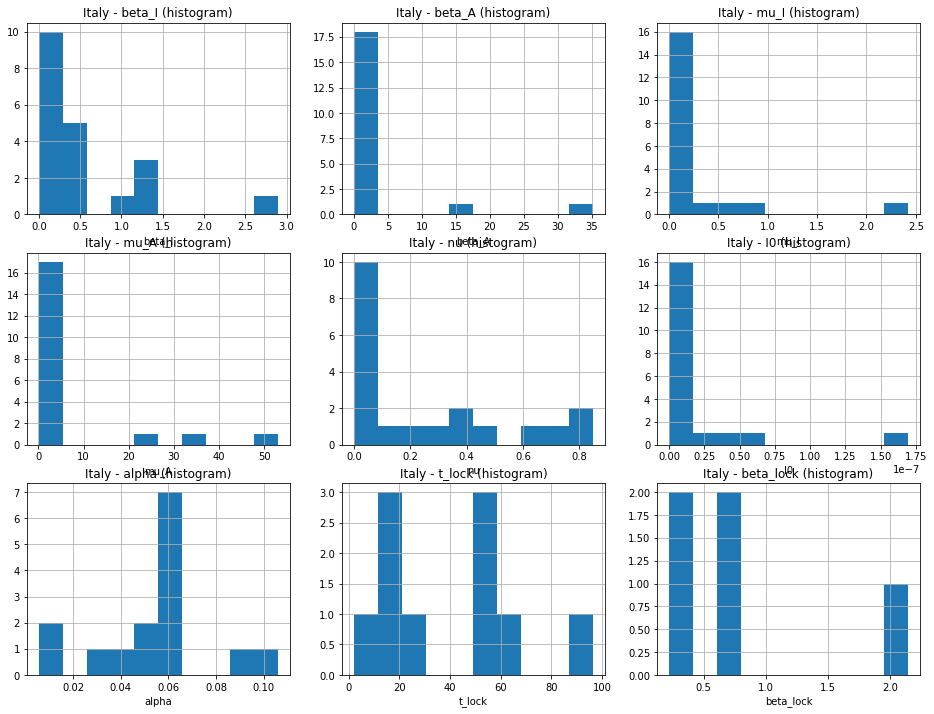

In [20]:
fig = plt.figure(figsize=(16,12))
for i, p in enumerate(params):
    plt.subplot(3,3,i+1)
    df[p].hist()
    plt.title(country + ' - '+p +' (histogram)')
    plt.xlabel(p)
plt.show()